(61544, 128)


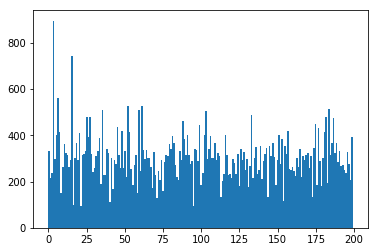

In [1]:
# SIFT keypoints, descriptors, VQ and SVM

%matplotlib inline
import sift

In [2]:
import k_dim_histogram

bob


In [1]:
# SIFT keypoints, LBP, SVM
import sift_lbp

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
# Dense keypoints, LBP, SVM

In [ ]:
# SIFT keypoints, LBP, spacial pyramid, SVM